In [3]:
import pandas as pd

# Step 1: Load the dataset
data=pd.read_csv(r"C:\Users\srava\OneDrive\Documents\Desktop\Personality-Logistic-Regression\personality_dataset.csv")  #2837

#Make a deep copy of the data
data_clean=data.copy()

In [5]:
data_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
data_clean.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
'''
 0   Time_spent_Alone(float64)----Average time spent alone by an individual (likely in hours/day or per week)
 1   Stage_fear(object)       ---Categorical variable (e.g., Yes/No or levels of fear during public speaking) 
 2   Social_event_attendance(float64)---Frequency of attending social events (possibly per month or per year)
 3   Going_outside(float64)   ----Frequency of going outside (daily/weekly count or scale)
 4   Drained_after_socializing(object)---Categorical response to whether the person feels exhausted after 
                                         socializing 
 5   Friends_circle_size(float64)----Number of close friends or social connections
 6   Post_frequency(float64)   ----Frequency of social media posting (posts/day or week)
 7   Personality(object)       ---Target variable indicating personality type (e.g., Introvert/Extrovert or MBTI types)	 
'''

In [9]:
import sweetviz
my_report = sweetviz.analyze([data_clean,"data_clean"])
my_report.show_html('Report.html')

#There are Missing values and duplicates.

C:\Users\srava\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
#Step:1 =  Deleting Unknown Columns

#All 7 features are relevent and meaningful.So there is no unnessesary columns to drop

#Step-2:Handling Missing Values

data_clean.isnull().sum()

'''Time_spent_Alone          63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65'''


# Drop rows where any column has a null value
data_clean= data_clean.dropna()

# Missing values were cleared
print(data_clean.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [13]:
#Step-3: Handling Duplicates

# Count duplicate rows
duplicate_count = data_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates
data_clean = data_clean.drop_duplicates()

# Final check
print("Final shape:", data_clean.shape)

Number of duplicate rows: 379
Final shape: (2098, 8)


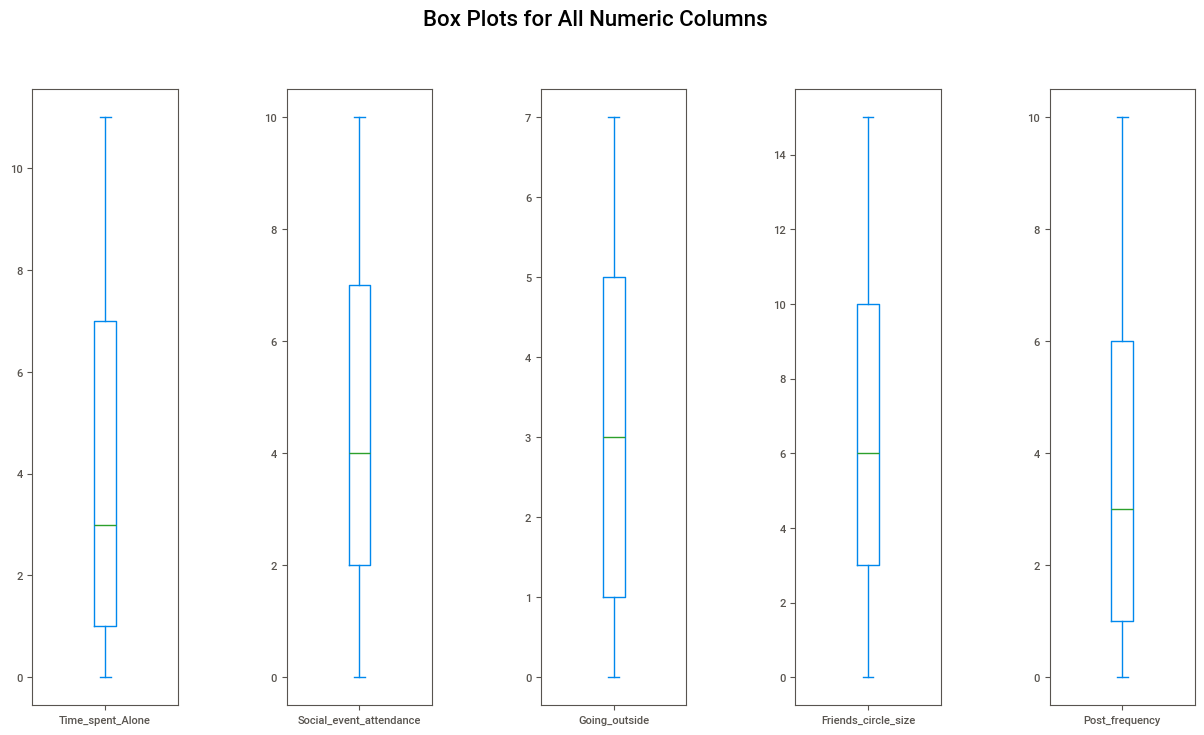

In [15]:
#Step-4:Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 3: Select only numeric columns
numeric_data = data_clean.select_dtypes(include=['float64', 'int64'])

# ✅ Step 4: Plot boxplots for each numeric column
numeric_data.plot(kind='box', subplots=True, sharey=False, figsize=(15, 8))
plt.subplots_adjust(wspace=0.75)
plt.suptitle('Box Plots for All Numeric Columns', fontsize=16)
plt.show()

#There is no outliers

In [17]:
# Step-5 : Feature Encoding

# Encode 'Yes' = 1, 'No' = 0 for binary features
binary_cols = ['Stage_fear', 'Drained_after_socializing']
data_clean[binary_cols] = data_clean[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Encode target column (optional - only if needed for modeling)
# 'Introvert' = 0, 'Extrovert' = 1
data_clean['Personality'] = data_clean['Personality'].map({'Introvert': 0, 'Extrovert': 1})


# ----------------   END OF PREPROCESSING    ------------------------

C:\Users\srava\AppData\Local\Temp\ipykernel_30948\1570395725.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean[binary_cols] = data_clean[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


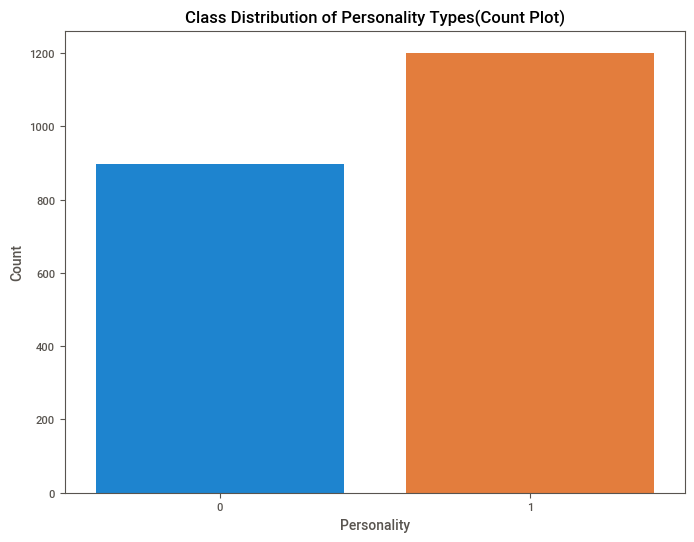

In [19]:
################### EDA (Exploratory Data Analysis) #####################


# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Personality', data=data_clean)
plt.title('Class Distribution of Personality Types(Count Plot)')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


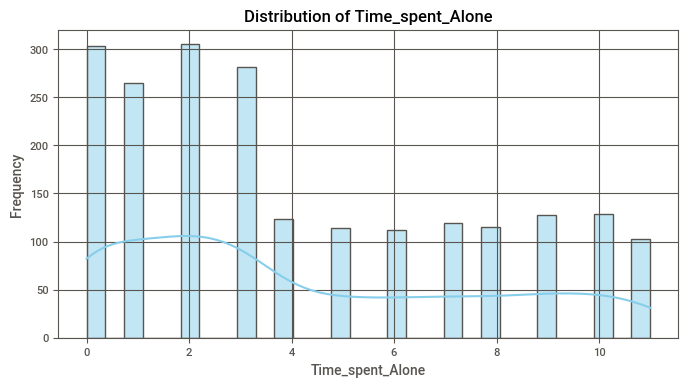

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


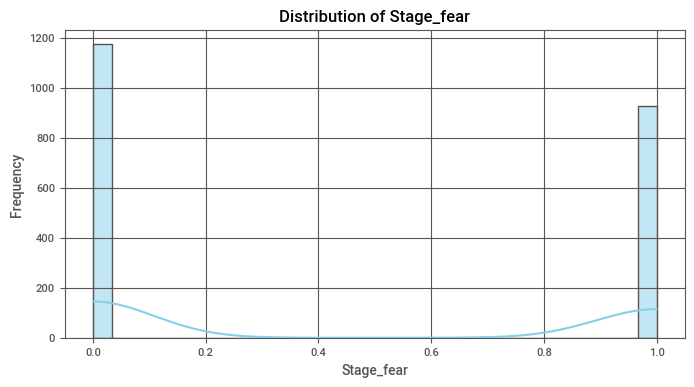

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


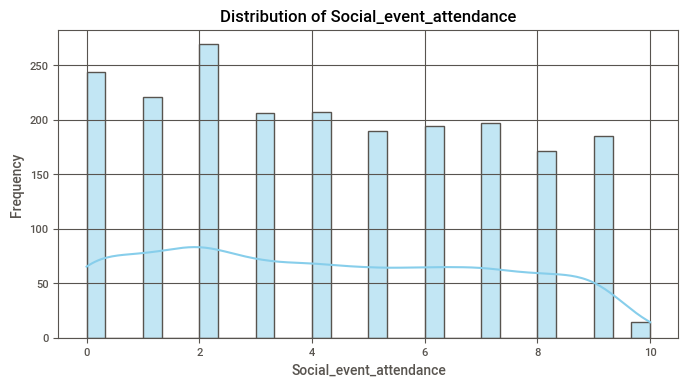

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


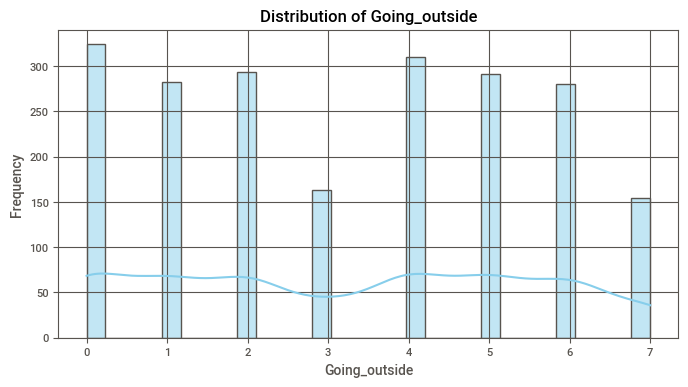

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


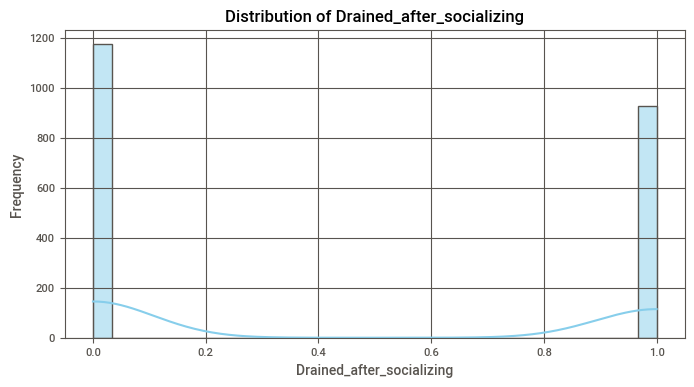

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


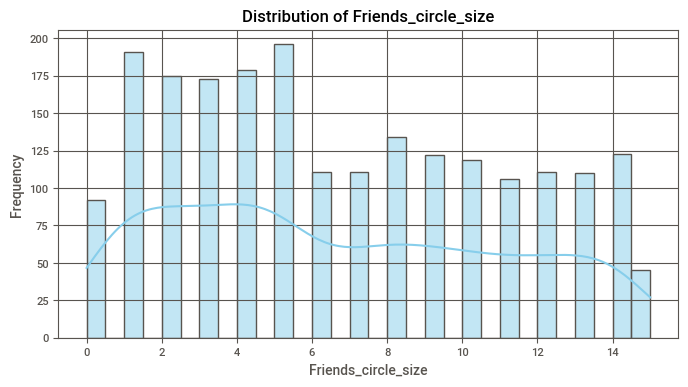

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


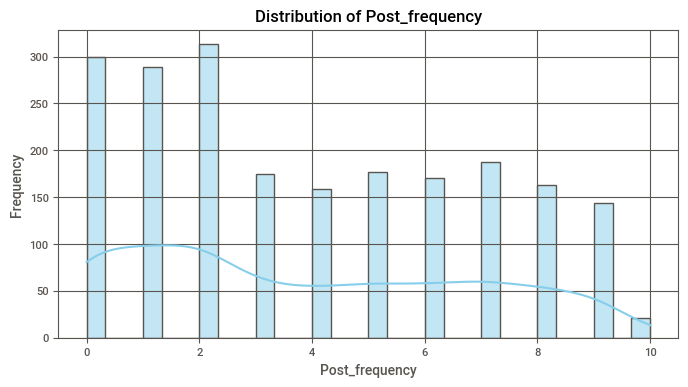

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


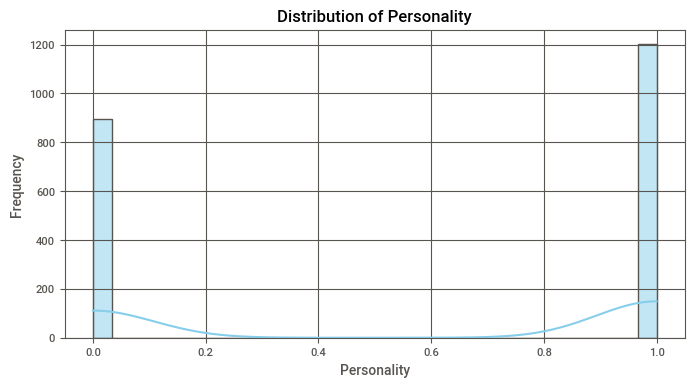

In [21]:
#1. Distribution of Numerical Columns
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram + KDE for all numerical features
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_clean[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

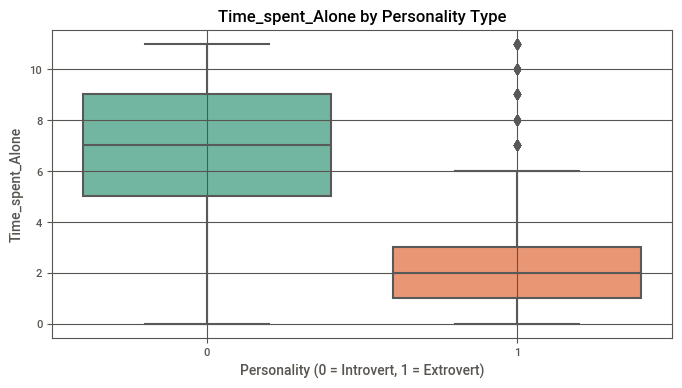

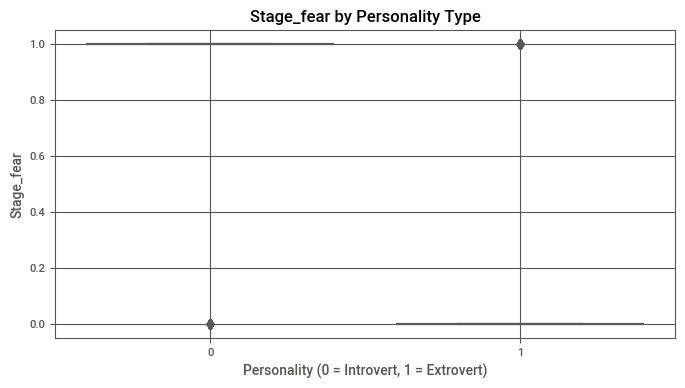

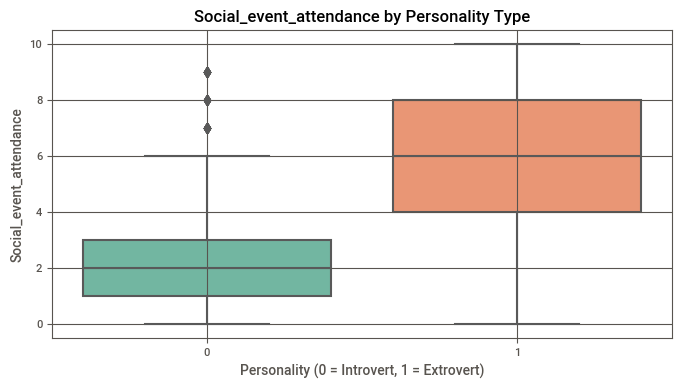

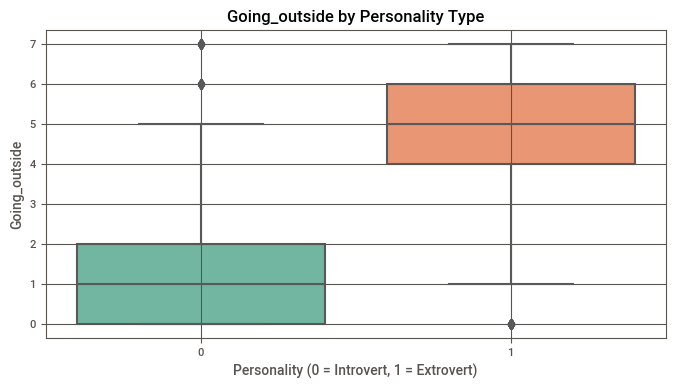

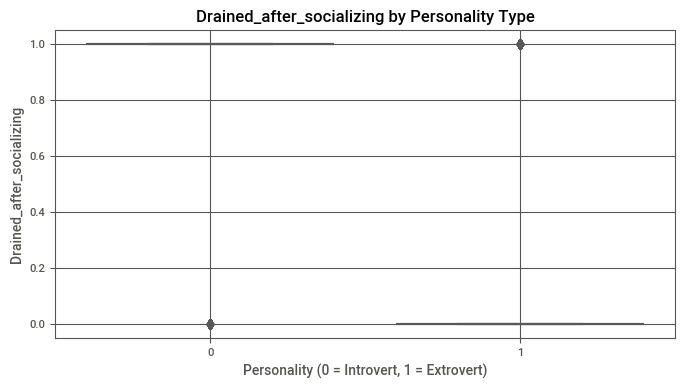

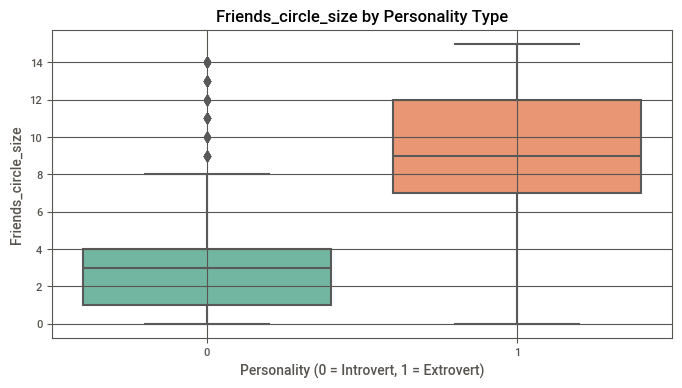

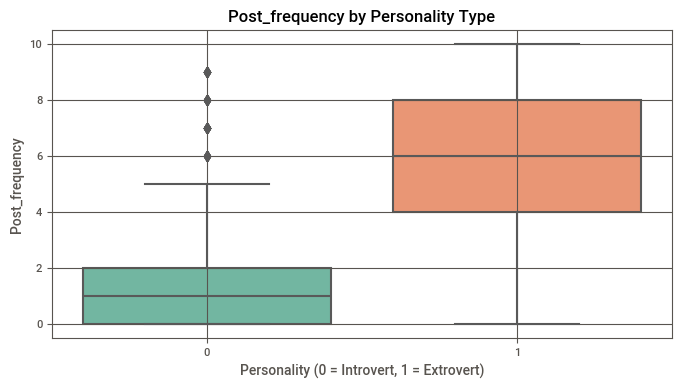

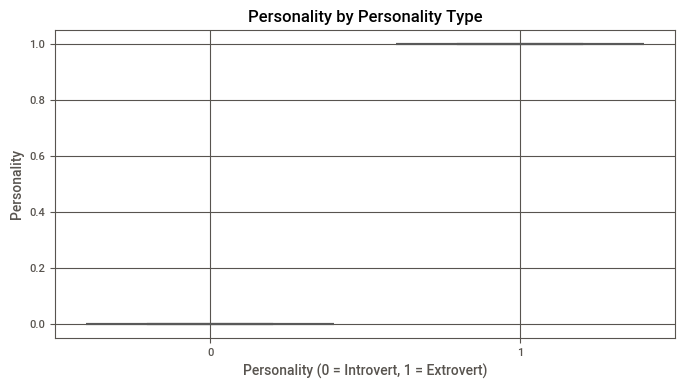

In [23]:
#Boxplots by Personality
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Personality', y=col, data=data_clean, palette='Set2')
    plt.title(f'{col} by Personality Type')
    plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

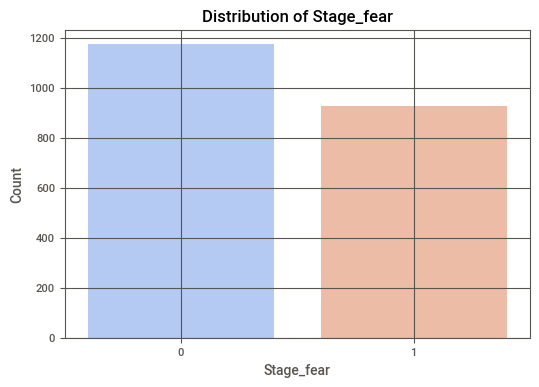

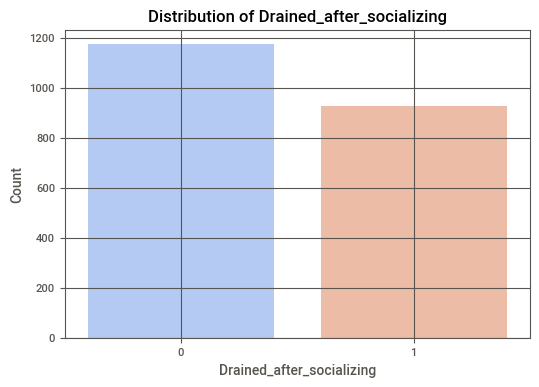

In [25]:
#Bar Plots for Binary Features
binary_cols = ['Stage_fear', 'Drained_after_socializing']

for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data_clean, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

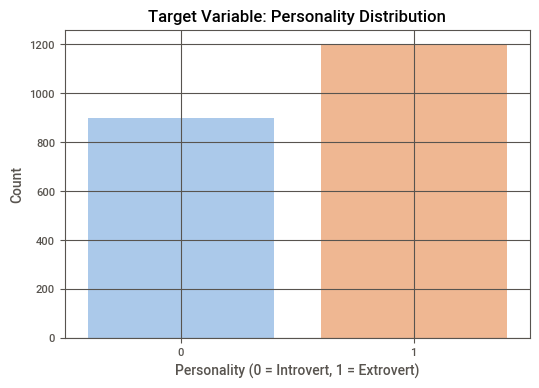

In [27]:
#Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=data_clean, palette='pastel')
plt.title('Target Variable: Personality Distribution')
plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srava\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

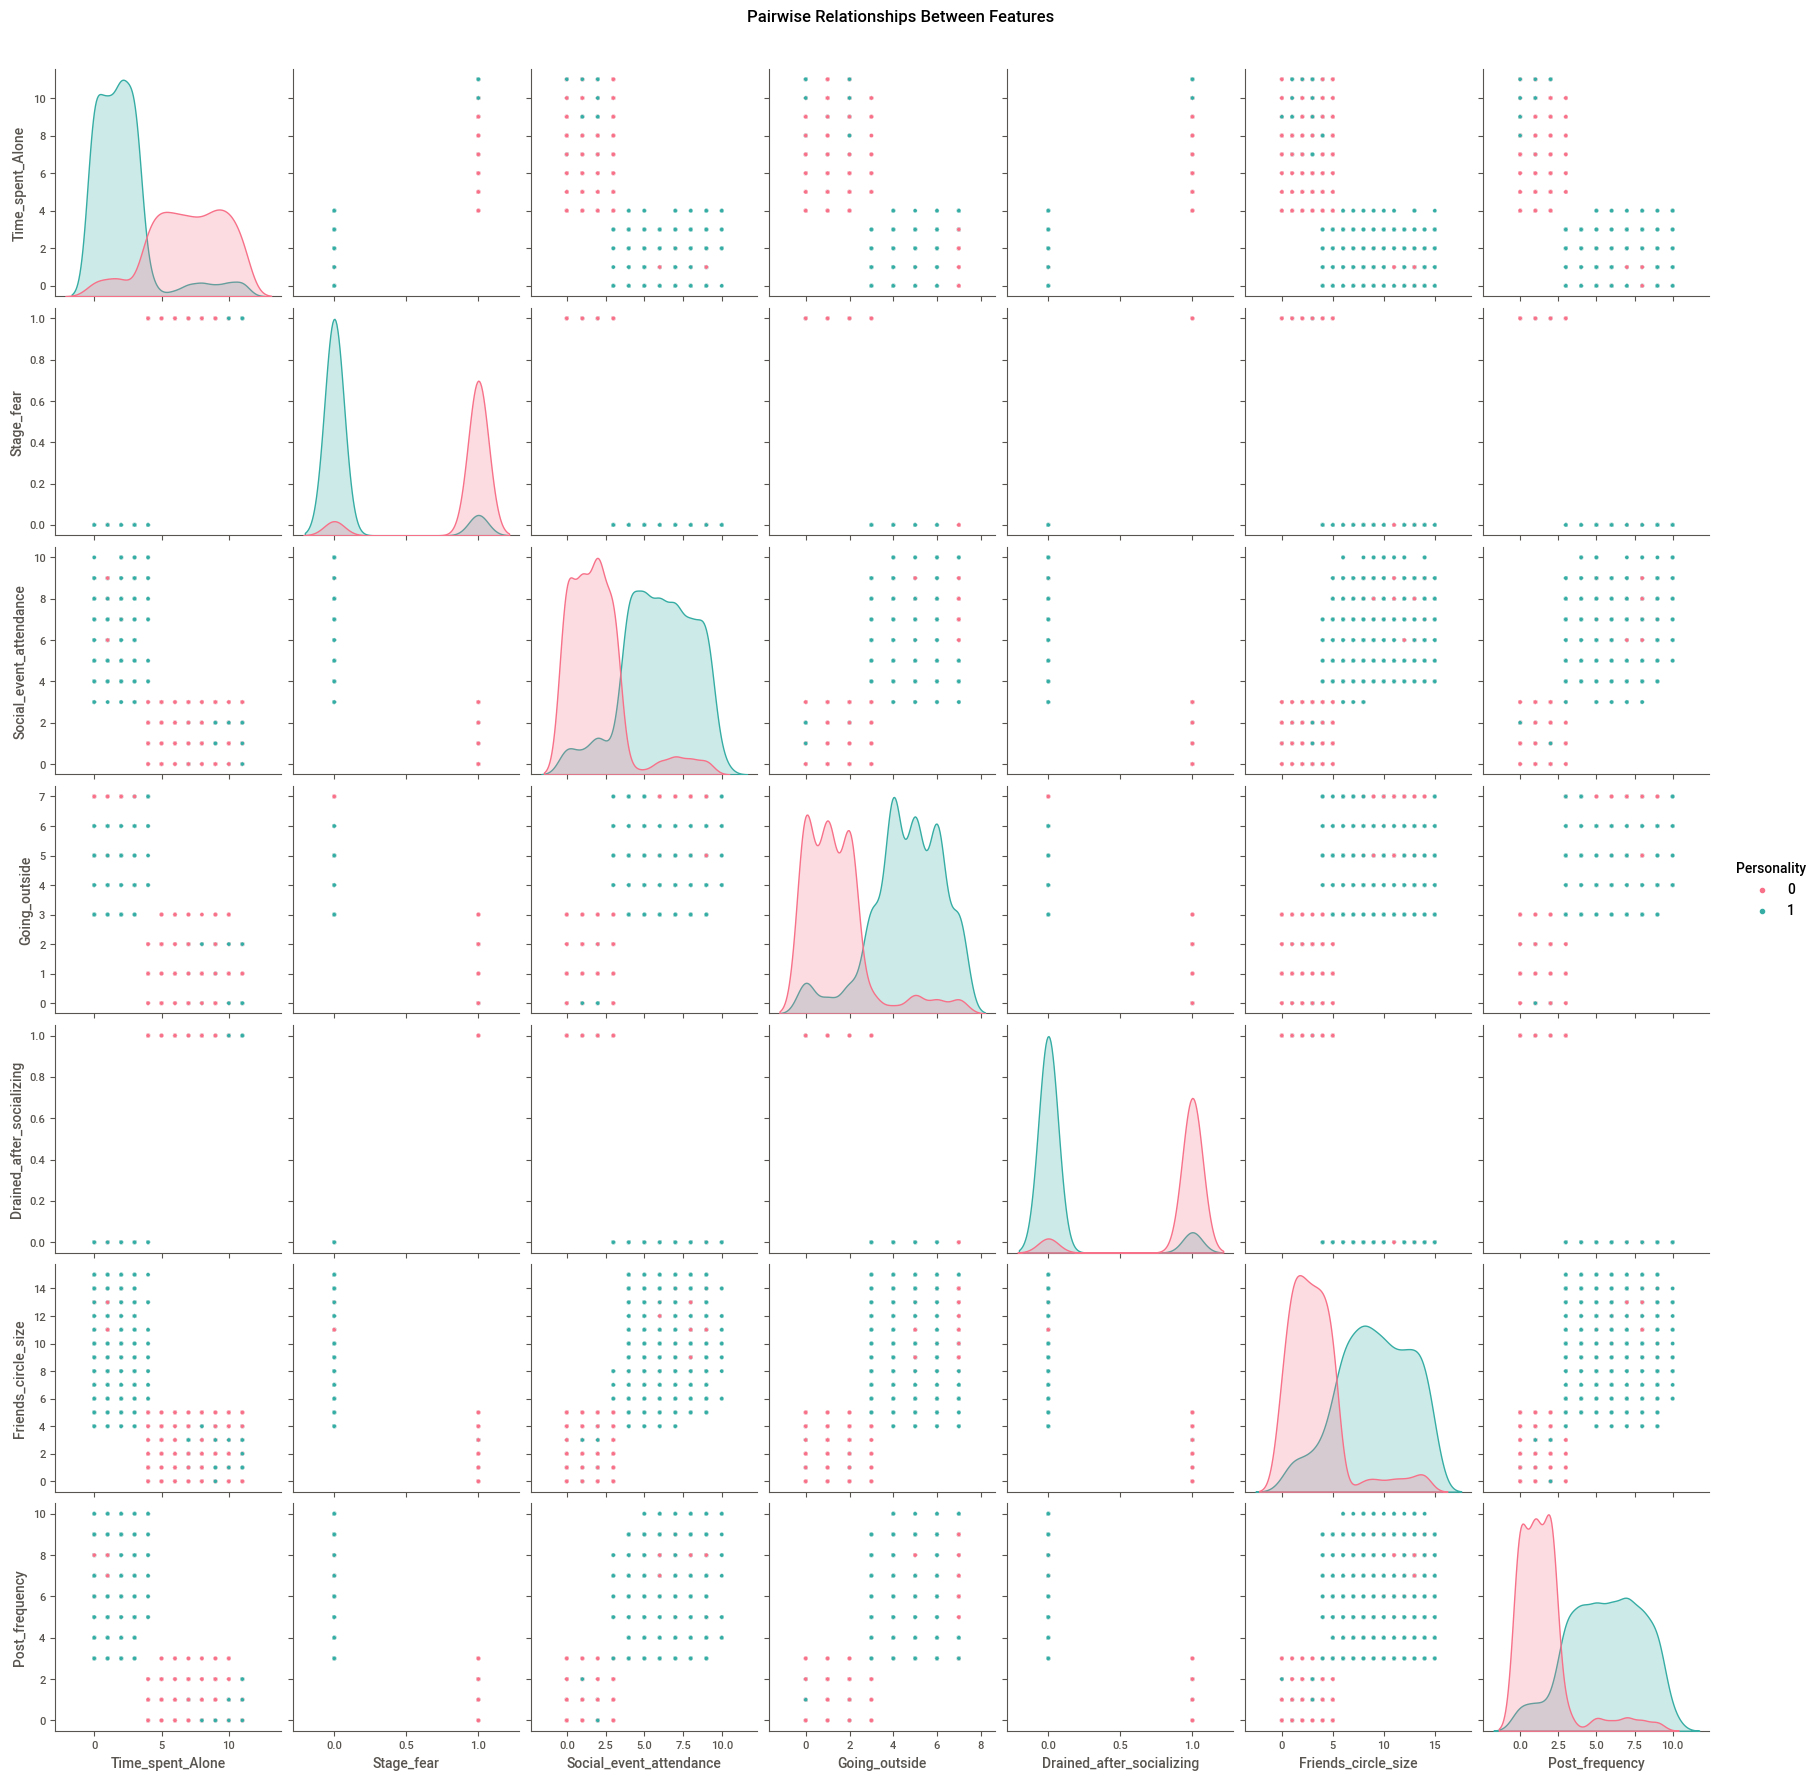

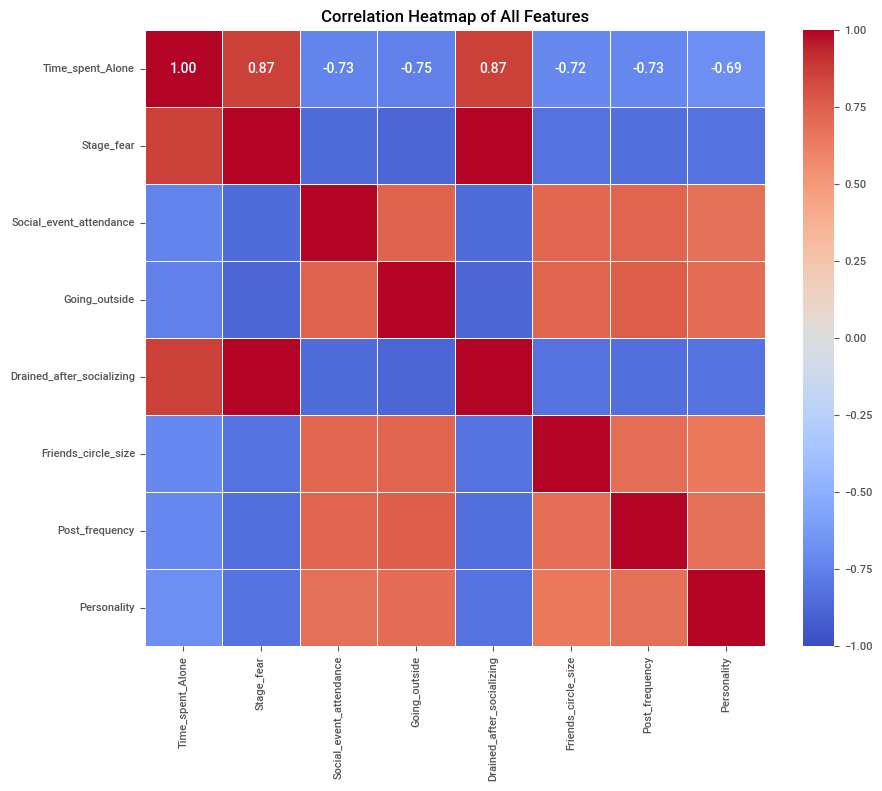

In [29]:
#Pair Plot of Feature Interactions
# For smaller datasets only – pairplots are compute-heavy
sns.pairplot(data_clean, hue='Personality', palette='husl', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = data_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Features")
plt.show()


In [31]:
#Step-5:Model Building


#Logistic Regression (simple, interpretable)

# Separate features (X) and target (y)
X = data_clean.drop(columns=['Personality'])  # Features
y = data_clean['Personality']                 # Target

from sklearn.preprocessing import LabelEncoder

# Encode target: Introvert = 0, Extrovert = 1
from sklearn.model_selection import train_test_split

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#1678-train,test-420 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


# Feature names
feature_names = X.columns

# Get intercept (bias term w₀)
intercept = log_model.intercept_[0]
print(f"Intercept (bias w₀): {intercept:.4f}")

# Get coefficients (w₁ to w₇)
coefficients = log_model.coef_[0]

# Print weights with feature names
print("\nFeature Weights (w₁ to wₙ):")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

Logistic Regression Accuracy: 0.930952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       184
           1       0.95      0.92      0.94       236

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420

Intercept (bias w₀): 5.5117

Feature Weights (w₁ to wₙ):
Time_spent_Alone: 0.1398
Stage_fear: -3.9674
Social_event_attendance: -0.1118
Going_outside: -0.1853
Drained_after_socializing: -3.9674
Friends_circle_size: -0.1038
Post_frequency: -0.0674


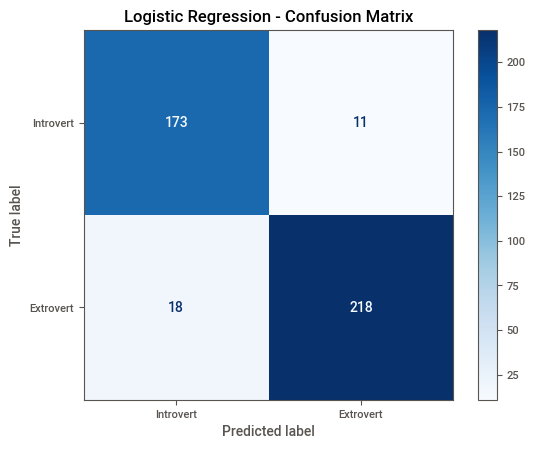

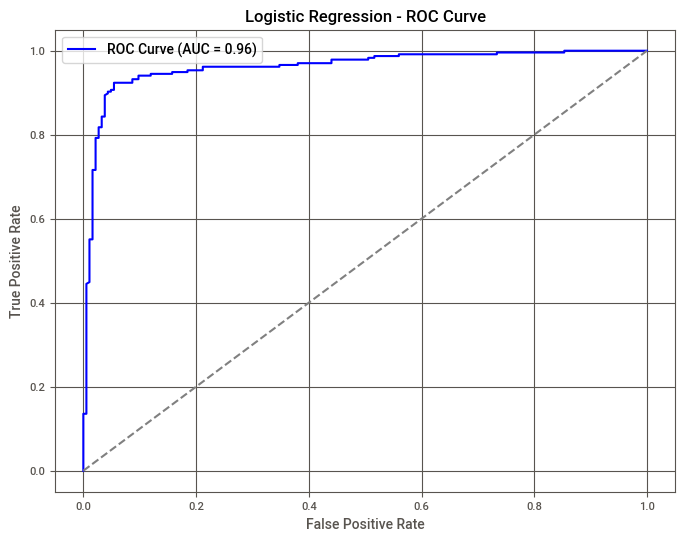

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.grid(False)
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities instead of binary predictions
y_probs = log_model.predict_proba(X_test)[:, 1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

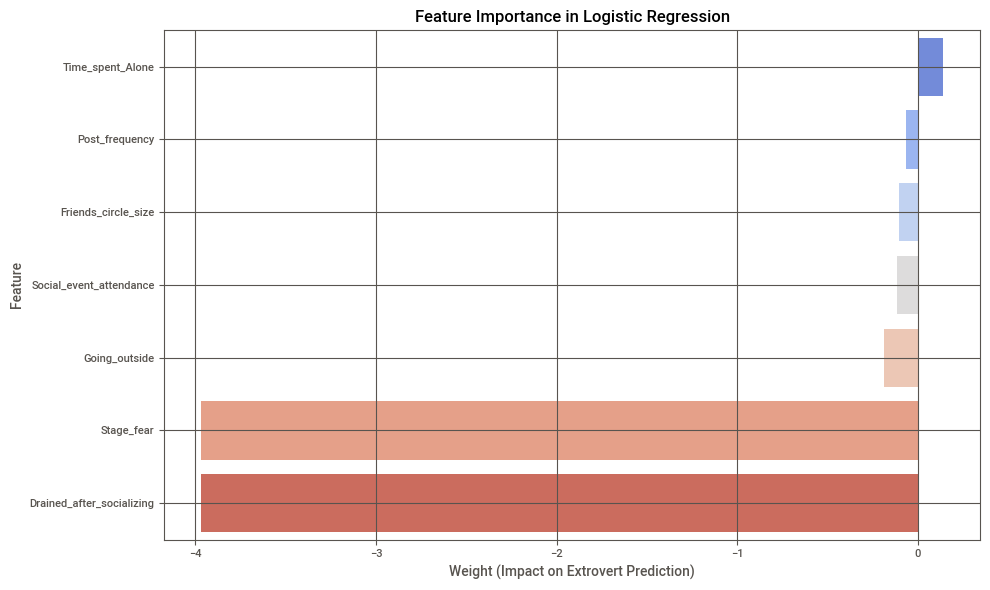

In [35]:
# Get coefficients and feature names
coefficients = log_model.coef_[0]
features = X.columns

# Create a DataFrame for plotting
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Weight (Impact on Extrovert Prediction)')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''Conclusion
The logistic regression model achieved a strong accuracy of 93.1% in classifying individuals as Introverts (0) or Extroverts (1) based on psychological and behavioral factors.

Key Evaluation Metrics:
Precision:

Introverts: 91%

Extroverts: 95%

Recall:

Introverts: 94%

Extroverts: 92%

F1-Score (balanced performance): 93%

This indicates the model performs consistently well in predicting both personality types, with slightly better precision on extroverts.

Interpretation of Model Coefficients:
Feature	Coefficient	Interpretation
Stage_fear	-3.97	Strong negative weight – individuals with stage fear are highly likely to be introverts.
Drained_after_socializing	-3.97	Also strongly associated with introversion.
Going_outside	-0.18	More frequent outings slightly point toward extroversion.
Social_event_attendance	-0.11	Those who attend more events lean toward extroversion.
Post_frequency	-0.07	Posting more on social media is mildly linked to extroversion.
Friends_circle_size	-0.10	Larger friend groups slightly suggest extroversion.
Time_spent_Alone	+0.14	Spending more time alone is moderately associated with introversion.

The strongest predictors of introversion are:

Stage Fear

Feeling drained after socializing'''